In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
dados = pd.read_csv("BRA.csv")


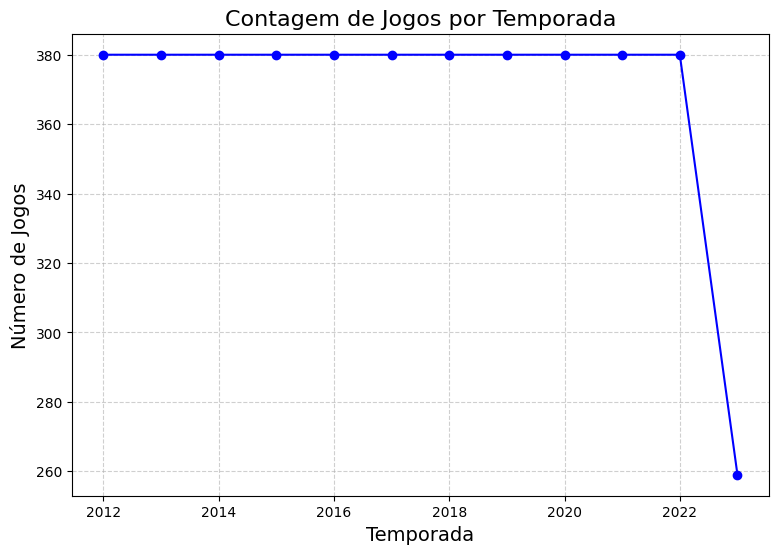

In [46]:
# Contagem de jogos por temporada
contagem_temporada = dados['Season'].value_counts().sort_index()

# Plot do gráfico de linha
plt.figure(figsize=(9, 6))
contagem_temporada.plot(kind='line', marker='o', linestyle='-', color='blue')

# Personalize o gráfico
plt.title('Contagem de Jogos por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Número de Jogos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

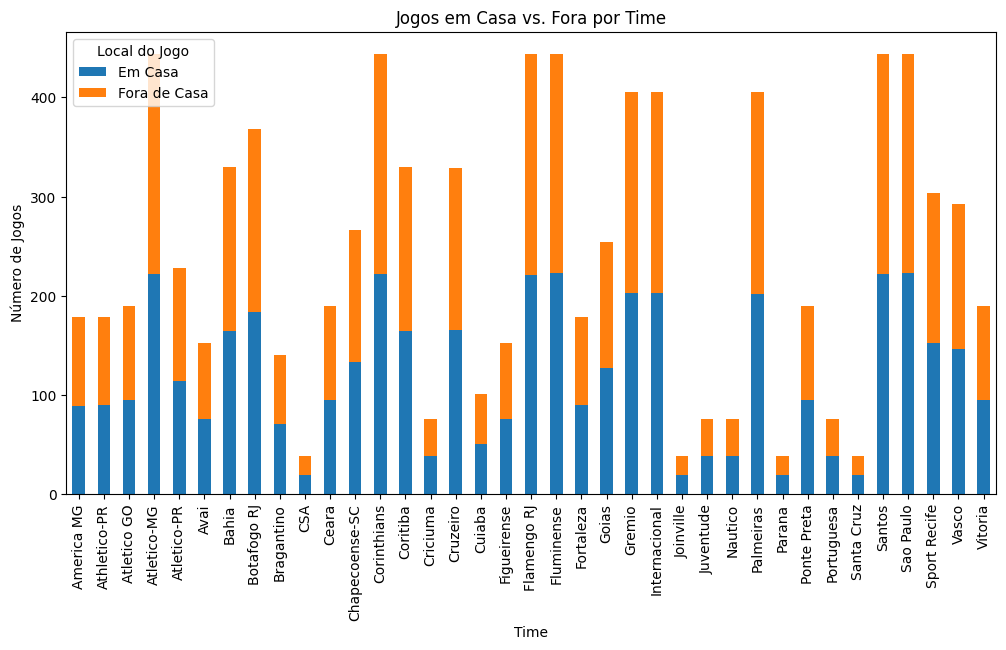

In [31]:
# Contagem de jogos em casa e fora
contagem_casa = dados['Home'].value_counts()
contagem_fora = dados['Away'].value_counts()

# Juntar as contagens em um DataFrame
contagem_casa_fora = pd.DataFrame({'Em Casa': contagem_casa, 'Fora de Casa': contagem_fora})

# Plot das contagens em um gráfico de barras empilhadas
contagem_casa_fora.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Jogos em Casa vs. Fora por Time')
plt.xlabel('Time')
plt.ylabel('Número de Jogos')
plt.legend(title='Local do Jogo')
plt.show()



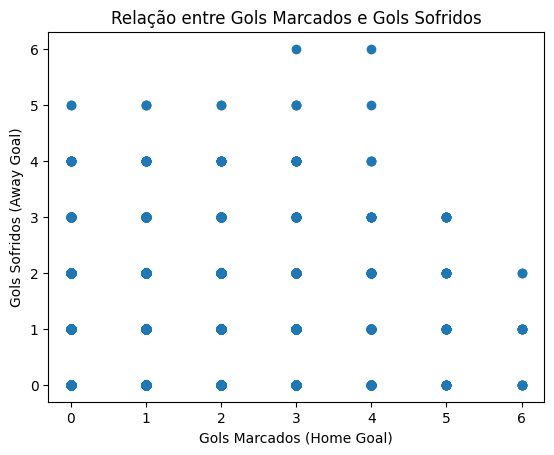

In [41]:
# Gráfico de dispersão entre gols marcados e gols sofridos
plt.scatter(dados['HG'], dados['AG'])
plt.title('Relação entre Gols Marcados e Gols Sofridos')
plt.xlabel('Gols Marcados (Home Goal)')
plt.ylabel('Gols Sofridos (Away Goal)')
plt.show()


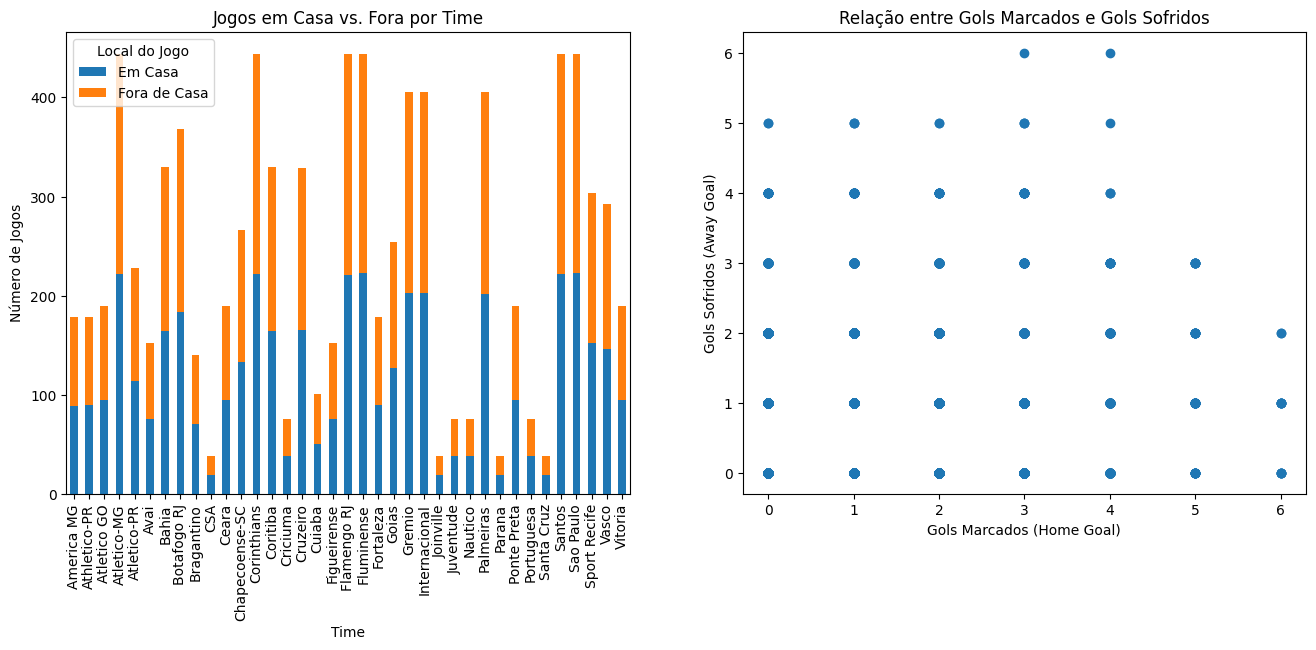

In [70]:
# Contagem de jogos em casa e fora
contagem_casa = dados['Home'].value_counts()
contagem_fora = dados['Away'].value_counts()

# Gráfico de dispersão entre gols marcados e gols sofridos
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro subplot: Gráfico de Barras de Jogos em Casa vs. Fora por Time
contagem_casa_fora = pd.DataFrame({'Em Casa': contagem_casa, 'Fora de Casa': contagem_fora})
contagem_casa_fora.plot(kind='bar', ax=axs[0], stacked=True)
axs[0].set_title('Jogos em Casa vs. Fora por Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Número de Jogos')
axs[0].legend(title='Local do Jogo')

# Segundo subplot: Gráfico de Dispersão entre Gols Marcados e Gols Sofridos
axs[1].scatter(dados['HG'], dados['AG'])
axs[1].set_title('Relação entre Gols Marcados e Gols Sofridos')
axs[1].set_xlabel('Gols Marcados (Home Goal)')
axs[1].set_ylabel('Gols Sofridos (Away Goal)')

plt.show()


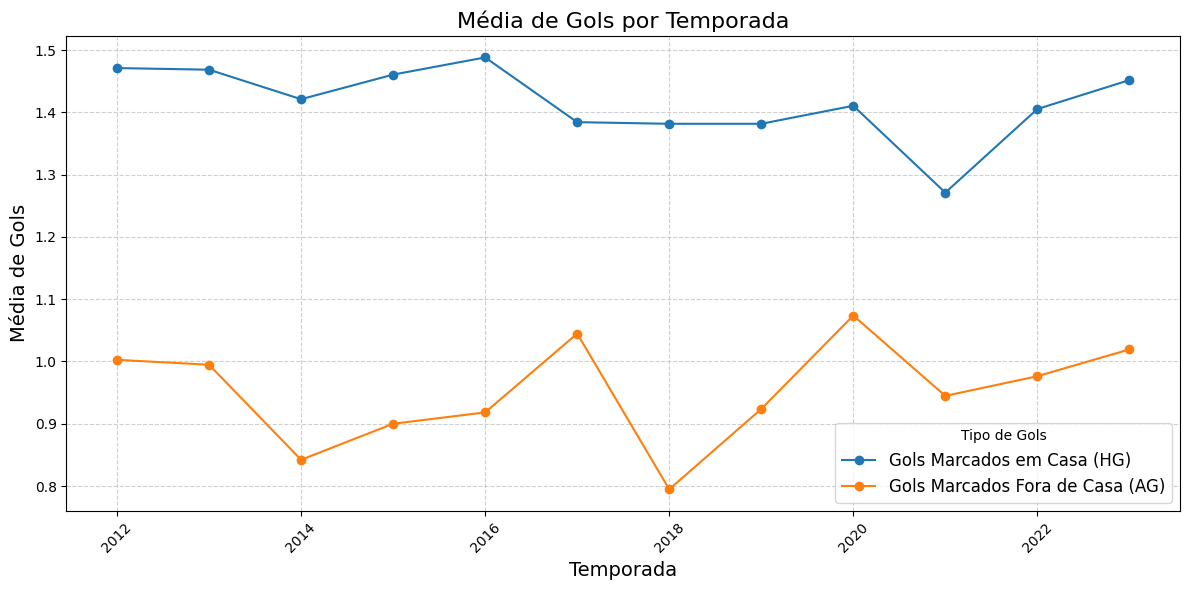

In [80]:
# Agrupar os dados por temporada (Season) e calcular as médias de gols marcados em casa (HG) e gols marcados fora de casa (AG)
season_stats = dados.groupby('Season')[['HG', 'AG']].mean()

# Plot do gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(season_stats.index, season_stats['HG'], marker='o', label='Gols Marcados em Casa (HG)')
plt.plot(season_stats.index, season_stats['AG'], marker='o', label='Gols Marcados Fora de Casa (AG)')

# Personalize o gráfico
plt.title('Média de Gols por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Média de Gols', fontsize=14)
plt.legend(title='Tipo de Gols', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

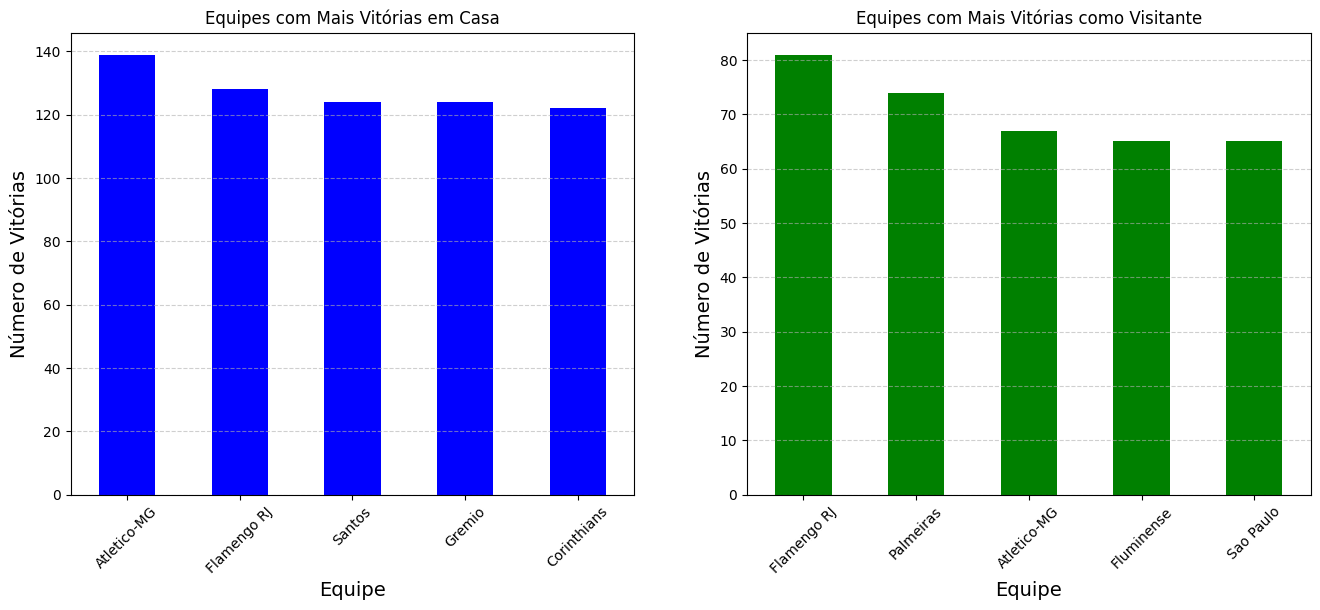

In [86]:
# Equipes com mais vitórias em casa
home_win_teams = dados[dados['Res'] == 'H']['Home'].value_counts().head(5)

# Equipes com mais vitórias como visitante
away_win_teams = dados[dados['Res'] == 'A']['Away'].value_counts().head(5)

# Criação da figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro subplot: Gráfico de Barras das Equipes com Mais Vitórias em Casa
home_win_teams.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Equipes com Mais Vitórias em Casa')
axs[0].set_xlabel('Equipe', fontsize=14)
axs[0].set_ylabel('Número de Vitórias', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Segundo subplot: Gráfico de Barras das Equipes com Mais Vitórias como Visitante
away_win_teams.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Equipes com Mais Vitórias como Visitante')
axs[1].set_xlabel('Equipe', fontsize=14)
axs[1].set_ylabel('Número de Vitórias', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


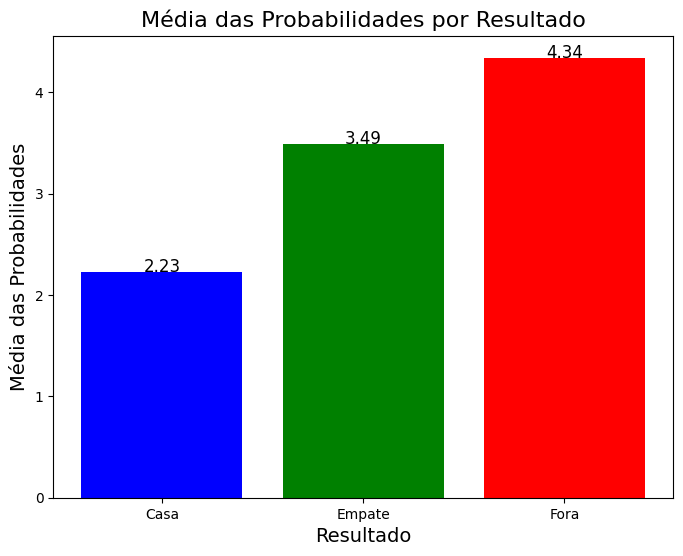

In [82]:
avg_home_odds = dados['AvgH'].mean()
avg_draw_odds = dados['AvgD'].mean()
avg_away_odds = dados['AvgA'].mean()

# Valores das médias
medias = [avg_home_odds, avg_draw_odds, avg_away_odds]

# Rótulos das probabilidades
labels = ['Casa', 'Empate', 'Fora']

# Cores para as barras
cores = ['blue', 'green', 'red']

# Plot do gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, color=cores)

# Personalize o gráfico
plt.title('Média das Probabilidades por Resultado', fontsize=16)
plt.xlabel('Resultado', fontsize=14)
plt.ylabel('Média das Probabilidades', fontsize=14)

# Mostra os valores acima das barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.002, f'{media:.2f}', ha='center', fontsize=12)

plt.show()

In [77]:
# Agrupar os dados por resultado (Res) e calcular as médias das odds
# PH(Probabilidade da vitória do time da casa), PD (Probabilidade de empate), PA (Probabilidade da vitória do time visitante)
odds_resultados = dados.groupby('Res')[['PH', 'PD', 'PA']].mean()
print("Médias das Odds por Resultado:\n", odds_resultados)

Médias das Odds por Resultado:
            PH        PD        PA
Res                              
A    2.708907  3.520324  3.824204
D    2.390042  3.540600  4.325983
H    2.058452  3.777604  5.360348


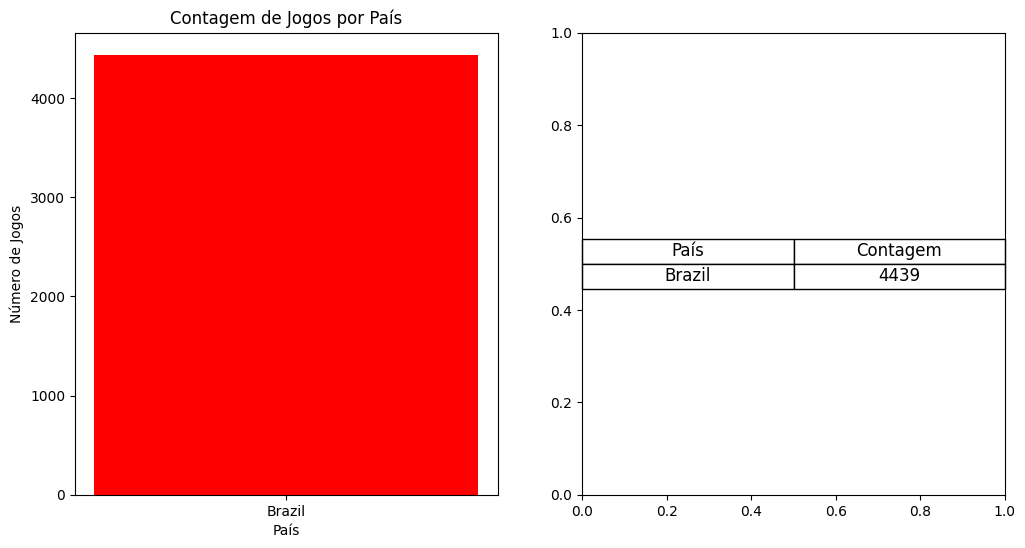

In [69]:
# Contagem de jogos por país
contagem_pais = dados['Country'].value_counts()

# Criar uma figura com duas subtramas: uma para o gráfico e outra para a tabela
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
ax1.bar(contagem_pais.index, contagem_pais, color='red')
ax1.set_title('Contagem de Jogos por País')
ax1.set_xlabel('País')
ax1.set_ylabel('Número de Jogos')

# Tabela
df_contagem_pais = pd.DataFrame({'País': contagem_pais.index, 'Contagem': contagem_pais.values})
table = ax2.table(cellText=df_contagem_pais.values, colLabels=df_contagem_pais.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.show()

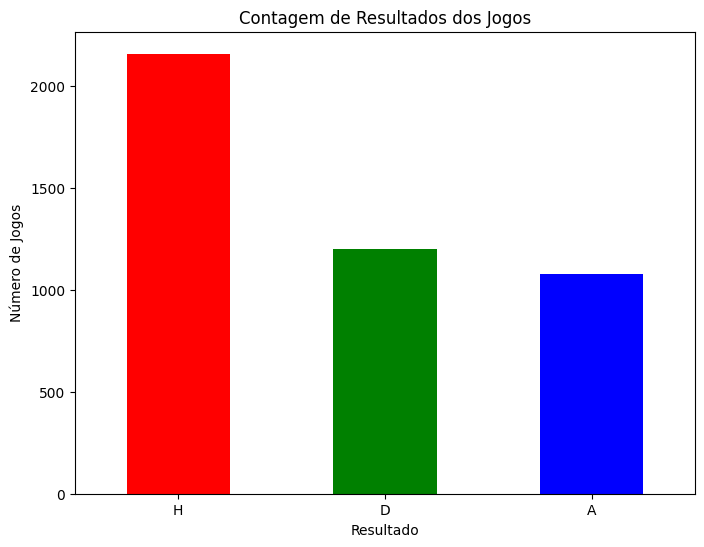

In [39]:
# Contagem de resultados
contagem_resultados = dados['Res'].value_counts()

# Plot da contagem de resultados em um gráfico de barras
contagem_resultados.plot(kind='bar', figsize=(8, 6), color=['red', 'green', 'blue'])

# Personalize o gráfico
plt.title('Contagem de Resultados dos Jogos')
plt.xlabel('Resultado')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=0)  # Rotação dos rótulos no eixo x para melhor legibilidade

plt.show()


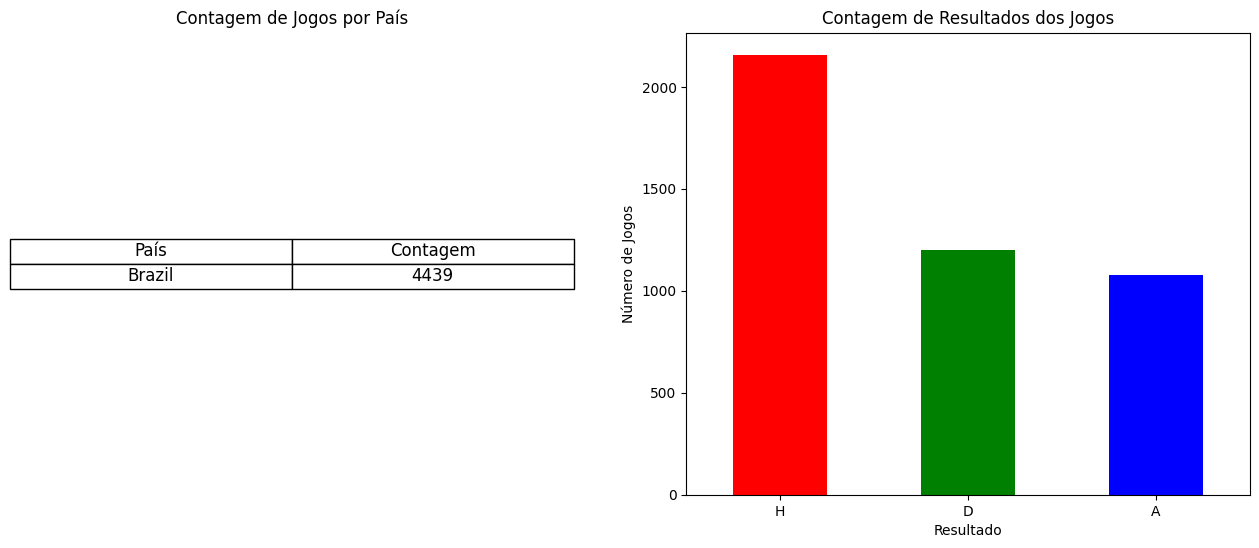

In [68]:
#Relação entre jogos e resultados
# Contagem de jogos por país
contagem_pais = dados['Country'].value_counts()
# Contagem de resultados
contagem_resultados = dados['Res'].value_counts()

# Criação da figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro subplot: Tabela de Contagem de Países
df_contagem_pais = pd.DataFrame({'País': contagem_pais.index, 'Contagem': contagem_pais.values})
axs[0].axis('tight')
axs[0].axis('off')
table1 = axs[0].table(cellText=df_contagem_pais.values, colLabels=df_contagem_pais.columns, loc='center', cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1, 1.5)
axs[0].set_title('Contagem de Jogos por País')

# Segundo subplot: Gráfico de barras da Contagem de Resultados
contagem_resultados.plot(kind='bar', ax=axs[1], color=['red', 'green', 'blue'])
axs[1].set_title('Contagem de Resultados dos Jogos')
axs[1].set_xlabel('Resultado')
axs[1].set_ylabel('Número de Jogos')
axs[1].tick_params(axis='x', rotation=0)

plt.show()
